In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("data/Exercise2DataSet.csv")
df

,age,LOS,previous_LOS,previous_ICU_stays,cvc_status,SIRS_48_hour,MV_24_hour,Initial_SOFA,Discharge_SOFA,Max_SOFA,AdmitApache,DischargeApache,sex,Type,death
0,86,160.983333,1.800000,0,0,0,0,6,3,6,66,57,F,Surgical,0
1,61,103.533333,11.433333,0,1,1,0,7,4,7,80,73,F,Surgical,0
2,22,572.383333,14.450000,0,1,1,0,10,4,12,90,74,F,Surgical,0
3,58,51.200000,0.000000,0,1,1,1,7,3,7,78,64,M,Medical,0
4,18,35.116667,0.000000,0,0,1,1,7,2,7,73,49,M,Medical,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,47,114.400000,0.000000,0,0,0,0,3,3,7,64,50,F,Surgical,0
496,47,75.500000,1.216667,0,1,0,0,14,7,14,115,62,M,Medical,0
497,54,781.383333,0.000000,0,1,1,0,13,4,16,117,60,F,Surgical,0
498,76,69.083333,0.000000,0,1,1,0,7,2,7,88,38,F,Surgical,0


In [3]:
df[["sex", "Type"]]

,sex,Type
0,F,Surgical
1,F,Surgical
2,F,Surgical
3,M,Medical
4,M,Medical
...,...,...
495,F,Surgical
496,M,Medical
497,F,Surgical
498,F,Surgical


In [4]:
dummies = pd.get_dummies(df[["sex", "Type"]], drop_first=True)
dummies

,sex_M,Type_Surgical
0,False,True
1,False,True
2,False,True
3,True,False
4,True,False
...,...,...
495,False,True
496,True,False
497,False,True
498,False,True


In [5]:
df.drop(["sex", "Type"], axis=1, inplace=True)

In [6]:
df

,age,LOS,previous_LOS,previous_ICU_stays,cvc_status,SIRS_48_hour,MV_24_hour,Initial_SOFA,Discharge_SOFA,Max_SOFA,AdmitApache,DischargeApache,death
0,86,160.983333,1.800000,0,0,0,0,6,3,6,66,57,0
1,61,103.533333,11.433333,0,1,1,0,7,4,7,80,73,0
2,22,572.383333,14.450000,0,1,1,0,10,4,12,90,74,0
3,58,51.200000,0.000000,0,1,1,1,7,3,7,78,64,0
4,18,35.116667,0.000000,0,0,1,1,7,2,7,73,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,47,114.400000,0.000000,0,0,0,0,3,3,7,64,50,0
496,47,75.500000,1.216667,0,1,0,0,14,7,14,115,62,0
497,54,781.383333,0.000000,0,1,1,0,13,4,16,117,60,0
498,76,69.083333,0.000000,0,1,1,0,7,2,7,88,38,0


In [7]:
df = pd.concat([df, dummies], axis=1)
df.head()

,age,LOS,previous_LOS,previous_ICU_stays,cvc_status,SIRS_48_hour,MV_24_hour,Initial_SOFA,Discharge_SOFA,Max_SOFA,AdmitApache,DischargeApache,death,sex_M,Type_Surgical
0,86,160.983333,1.800000,0,0,0,0,6,3,6,66,57,0,False,True
1,61,103.533333,11.433333,0,1,1,0,7,4,7,80,73,0,False,True
2,22,572.383333,14.450000,0,1,1,0,10,4,12,90,74,0,False,True
3,58,51.200000,0.000000,0,1,1,1,7,3,7,78,64,0,True,False
4,18,35.116667,0.000000,0,0,1,1,7,2,7,73,49,0,True,False


In [8]:
y = df.death.values
X = np.array(df.drop("death", axis=1))

In [9]:
X

array([[86, 160.9833333, 1.8, ..., 57, False, True],
       [61, 103.5333333, 11.43333333, ..., 73, False, True],
       [22, 572.3833333, 14.45, ..., 74, False, True],
       ...,
       [54, 781.3833333, 0.0, ..., 60, False, True],
       [76, 69.08333333, 0.0, ..., 38, False, True],
       [59, 66.9, 0.0, ..., 60, False, False]], dtype=object)

In [10]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut

In [12]:
loo = LeaveOneOut()
CVAccuracy = []

for train_index, validation_index in loo.split(X_train):
    X_trainv, X_valid = X_train[train_index], X_train[validation_index]
    y_trainv, y_valid = y_train[train_index], y_train[validation_index]
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_trainv, y_trainv)
    score = knn.score(X_valid, y_valid)
    CVAccuracy.append([score])
np.mean(CVAccuracy)


0.8475

In [13]:
loo = LeaveOneOut()
CVALL = []
for n in range(1, 25):
    CVAccuracy = []
    for train_index, validation_index in loo.split(X_train):
        X_trainv, X_valid = X_train[train_index], X_train[validation_index]
        y_trainv, y_valid = y_train[train_index], y_train[validation_index]
    
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_trainv, y_trainv)
        score = knn.score(X_valid, y_valid)
        CVAccuracy.append([score, n])
        df = pd.DataFrame(CVAccuracy, columns=["Validation Accuracy", "Neighbour Size"])
    CVALL.append([df["Validation Accuracy"].mean(), n])
df = pd.DataFrame(CVALL, columns=["Validation Accuracy", "Neighbour Size"])
df

,Validation Accuracy,Neighbour Size
0,0.8175,1
1,0.8450,2
2,0.8575,3
3,0.8475,4
4,0.8475,5
5,0.8550,6
6,0.8550,7
7,0.8450,8
8,0.8500,9
9,0.8375,10


In [14]:
df.nlargest(2, "Validation Accuracy").reset_index(drop=True)

,Validation Accuracy,Neighbour Size
0,0.8575,3
1,0.8550,6


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [16]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

CVAccuracy = []

for train_index, validation_index in cv.split(X_train):
    X_trainv, X_valid = X_train[train_index], X_train[validation_index]
    y_trainv, y_valid = y_train[train_index], y_train[validation_index]
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_trainv, y_trainv)
    score = knn.score(X_valid, y_valid)
    CVAccuracy.append(score)
df = pd.DataFrame(CVAccuracy, columns=["Validation Accuracy"])
print(df)
df.mean()

   Validation Accuracy
0                0.750
1                0.900
2                0.825
3                0.825
4                0.775
5                0.875
6                0.825
7                0.850
8                0.900
9                0.775


Validation Accuracy    0.83
dtype: float64

In [17]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
CVALL = []

for n in range(1, 25):
    CVAccuracy = []
    
    for train_index, validation_index in cv.split(X_train):
        X_trainv, X_valid = X_train[train_index], X_train[validation_index]
        y_trainv, y_valid = y_train[train_index], y_train[validation_index]
        
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_trainv, y_trainv)
        score = knn.score(X_valid, y_valid)
        CVAccuracy.append([score, n])
        df = pd.DataFrame(CVAccuracy, columns=["Validation Accuracy", "Neighbour Size"])
        
    CVALL.append([df["Validation Accuracy"].mean(), n])

df = pd.DataFrame(CVALL, columns=["Validation Accuracy", "Neighbour Size"])
df.head()

,Validation Accuracy,Neighbour Size
0,0.8100,1
1,0.8400,2
2,0.8425,3
3,0.8350,4
4,0.8400,5


In [18]:
df.nlargest(2, "Validation Accuracy").reset_index(drop=True)

,Validation Accuracy,Neighbour Size
0,0.8450,7
1,0.8425,3


In [19]:
from sklearn.metrics import accuracy_score

In [20]:
#Let's finally fit a model with a chosen number of neighbour
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.83

In [21]:
accuracy_score(y_test, y_pred)

0.83

In [22]:
confusion_matrix(y_test, y_pred)

array([[75,  6],
       [11,  8]])

# Standartization

In [23]:
df = pd.read_csv("data/Exercise2DataSet.csv")

In [24]:
dummies = pd.get_dummies(df[["sex", "Type"]], drop_first=True)
df.drop(["sex", "Type"], axis=1, inplace=True)
df = pd.concat([df, dummies], axis=1)

In [25]:
y = df.death.values
X = np.array(df.drop("death", axis=1))

In [26]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 14), (100, 14), (400,), (100,))

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
scaler.fit(X_train)

StandardScaler()

In [31]:
X_train_Standart = scaler.transform(X_train)
X_test_Standart = scaler.transform(X_test)

In [32]:
CVScores = []
loo = LeaveOneOut()

for train_index, validation_index in loo.split(X_train_Standart):
    X_trainv, X_valid = X_train_Standart[train_index], X_train_Standart[validation_index]
    y_trainv, y_valid = y_train[train_index], y_train[validation_index]
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_trainv, y_trainv)
    score = knn.score(X_valid, y_valid)
    CVScores.append(score)
    
np.array(CVScores).mean()

0.8725

In [33]:
from sklearn.pipeline import Pipeline

CVScores = []
loo = LeaveOneOut()

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

for train_index, validation_index in loo.split(X_train):
    X_trainv, X_valid = X_train[train_index], X_train[validation_index]
    y_trainv, y_valid = y_train[train_index], y_train[validation_index]
    
    pipeline.fit(X_trainv, y_trainv)
    y_pred = pipeline.predict(X_valid)
    score = accuracy_score(y_valid, y_pred)
    CVScores.append(score)

# Ortalama doğruluk oranı
mean_accuracy = np.mean(CVScores)
mean_accuracy

0.8725

In [34]:
# Initialize and fit the KNN model with the best number of neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_Standart, y_train)

# Compute test accuracy
y_pred = knn.predict(X_test_Standart)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy}")

# Create and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=np.unique(y), columns=np.unique(y))

conf_matrix_df

Test accuracy: 0.88


,0,1
0,77,4
1,8,11


(2.5, -0.5)

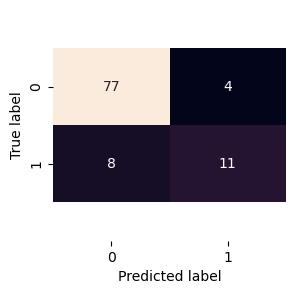

In [35]:
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(conf_matrix, annot=True, cbar=False)
plt.xlabel("Predicted label")
plt.ylabel("True label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.88
Precision: 0.7333333333333333
Recall: 0.5789473684210527
F1 Score: 0.6470588235294117


In [37]:
# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3))  # Use the best n_neighbors value
])

# Fit the pipeline with the training data
pipeline.fit(X_train, y_train)

# Compute test accuracy
y_test_pred = pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy: {test_accuracy}")

Test accuracy: 0.88


In [38]:
scores = cross_val_score(knn, X_train_Standart, y_train, cv=loo, scoring="accuracy")

In [39]:
scores.mean()

0.8725

In [40]:
scores = cross_val_score(pipeline, X_train, y_train, cv=loo, scoring="accuracy")
scores.mean()

0.8725

In [41]:
def test_different_neigbour_size(n):
    pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=n))
    ])
    return pipeline

In [42]:
n_accuracies = []

# Iterate over different neighbor sizes
for i in range(1, 11):
    
    pipeline = test_different_neigbour_size(i)
    
    scores = cross_val_score(pipeline, X_train, y_train, 
                             cv=KFold(n_splits=5, random_state=1, shuffle=True), scoring="accuracy")
    
    n_accuracies.append([scores.mean(), i])

df = pd.DataFrame(n_accuracies, columns=["Accuracy", "Neighbor Size"])

# Print the DataFrame
print(df)

   Accuracy  Neighbor Size
0    0.8275              1
1    0.8525              2
2    0.8800              3
3    0.8700              4
4    0.8875              5
5    0.8800              6
6    0.8925              7
7    0.8900              8
8    0.8975              9
9    0.8950             10


# Logistic Regression

In [43]:
df = pd.read_csv("data/Exercise2DataSet.csv")

In [44]:
dummies = pd.get_dummies(df[["sex", "Type"]], drop_first=True)
df.drop(["sex", "Type"], axis=1, inplace=True)
df = pd.concat([df, dummies], axis=1)

In [45]:
y = df.death.values
X = df.drop("death", axis=1)

In [46]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [48]:
scaler = StandardScaler()
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
X_testStandard = scaler.transform(X_test)

In [49]:
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
CV_accuracy = []
for c in c_values:
    logistic_reg = LogisticRegression(max_iter=1000, penalty="l2", C=c)
    pipe = make_pipeline(StandardScaler(), logistic_reg)
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    score = cross_val_score(pipe, X_train, y_train, scoring="accuracy", cv=cv)
    CV_accuracy.append([c, score.mean()])

df = pd.DataFrame(CV_accuracy, columns=["C (1/lambda)", "Validation Accuracy"])
df

,C (1/lambda),Validation Accuracy
0,0.001,0.8075
1,0.010,0.8775
2,0.100,0.8950
3,1.000,0.8975
4,10.000,0.8975
5,100.000,0.8975
6,1000.000,0.8975
7,10000.000,0.8975


In [50]:
df.sort_values("Validation Accuracy", ascending=False)

,C (1/lambda),Validation Accuracy
3,1.000,0.8975
4,10.000,0.8975
5,100.000,0.8975
6,1000.000,0.8975
7,10000.000,0.8975
2,0.100,0.8950
1,0.010,0.8775
0,0.001,0.8075


In [51]:
# Let's try with l1 penalty
CV_accuracy = []
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

for c in c_values:
    logistic_reg = LogisticRegression(max_iter=1000, C=c, penalty="l1", solver="liblinear")
    pipe = make_pipeline(StandardScaler(), logistic_reg)
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    score = cross_val_score(pipe, X_train, y_train, cv=cv)
    CV_accuracy.append([c, score.mean()])

df = pd.DataFrame(CV_accuracy, columns=["C (1/lambda)", "Validation Accuracy"])
df

,C (1/lambda),Validation Accuracy
0,0.001,0.8075
1,0.010,0.8075
2,0.100,0.9025
3,1.000,0.8950
4,10.000,0.8975
5,100.000,0.8975
6,1000.000,0.8975
7,10000.000,0.8975


In [52]:
df.sort_values("Validation Accuracy", ascending=False)

,C (1/lambda),Validation Accuracy
2,0.100,0.9025
4,10.000,0.8975
5,100.000,0.8975
6,1000.000,0.8975
7,10000.000,0.8975
3,1.000,0.8950
0,0.001,0.8075
1,0.010,0.8075


In [53]:
logistic_reg = LogisticRegression(max_iter=1000, C=0.100, penalty="l1", solver="liblinear")
logistic_reg.fit(X_train_Standart, y_train)
y_pred = logistic_reg.predict(X_test_Standart)
accuracy_score(y_test, y_pred)


0.92

In [54]:
logistic_reg.score(X_test_Standart, y_test)

0.92

In [55]:
model_intercept = pd.DataFrame({"Varaibles": "Intercept", "Coefficients": logistic_reg.intercept_[0]}, index=[0])
model_coefficients = pd.DataFrame({"Varaibles": X.columns, "Coefficients": logistic_reg.coef_[0]})
model_coefficients = pd.concat([model_intercept, model_coefficients]).reset_index(drop=True)
model_coefficients

,Varaibles,Coefficients
0,Intercept,-1.627448
1,age,0.211100
2,LOS,0.000000
3,previous_LOS,0.226088
4,previous_ICU_stays,0.000000
5,cvc_status,0.000000
6,SIRS_48_hour,0.054390
7,MV_24_hour,0.271352
8,Initial_SOFA,0.000000
9,Discharge_SOFA,0.736488


In [56]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[80,  1],
       [ 7, 12]])

(2.5, -0.5)

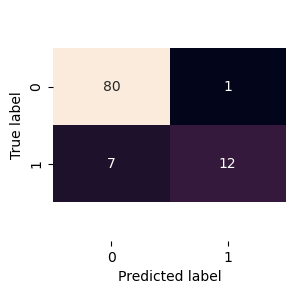

In [57]:
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(conf_matrix, annot=True, cbar=False)
plt.xlabel("Predicted label")
plt.ylabel("True label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [58]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.92
Precision: 0.9230769230769231
Recall: 0.631578947368421
F1 Score: 0.7499999999999999
